In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_rotten_tomatoes_critic = pd.read_csv("data/zippedData/rotten_tomatoes_critic_reviews.csv.gz")

In [7]:
df_rotten_tomatoes_critic

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [8]:
df_rotten_tomatoes_critic.dropna()
#dropping null values

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."
...,...,...,...,...,...,...,...,...
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [9]:
df_rotten_tomatoes_movies = pd.read_csv("data/zippedData/rotten_tomatoes_movies.csv.gz")
df_rotten_tomatoes_movies.head(1)
#importing and first row

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [10]:
df_rotten_tomatoes_movies_clean = df_rotten_tomatoes_movies.drop(['tomatometer_count','critics_consensus', 'rotten_tomatoes_link', 'movie_info', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company'], axis=1).dropna()
df_rotten_clean = df_rotten_tomatoes_movies_clean.sort_values(by=['audience_count','tomatometer_rating','audience_rating'], ascending = False).head()
df_rotten_clean
#took the df and dropped extra colmns and then sorted them by audience tomato meter and audience

,movie_title,content_rating,genres,runtime,tomatometer_status,tomatometer_rating,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
16297,Titanic,PG-13,"Drama, Romance",195.0,Certified-Fresh,89.0,Upright,69.0,35797635.0,62,171,21
15410,The Lord of the Rings: The Return of the King,PG-13,"Action & Adventure, Classics, Science Fiction ...",200.0,Certified-Fresh,93.0,Upright,86.0,34679773.0,53,257,18
13694,Spider-Man,PG-13,"Action & Adventure, Mystery & Suspense, Scienc...",116.0,Certified-Fresh,90.0,Upright,67.0,34297354.0,47,220,25
13276,Shrek 2,PG,"Animation, Comedy, Kids & Family, Science Fict...",92.0,Certified-Fresh,89.0,Upright,69.0,34232524.0,53,209,27
7526,Harry Potter and the Goblet of Fire,PG-13,"Action & Adventure, Kids & Family, Science Fic...",157.0,Certified-Fresh,88.0,Upright,74.0,34153607.0,53,224,31


In [12]:
df_tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv.gz")

In [13]:
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
df_tn_movie_budgets =  pd.read_csv("data/zippedData/tn.movie_budgets.csv.gz")

In [15]:
df_tn_movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [17]:
df_tmdb_data = pd.read_csv("data/zippedData/tmdb_movies_data.csv")
df_tmdb_data
#importing data frame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [18]:
df_tmdb_clean = df_tmdb_data.drop(['cast','homepage','tagline','overview','production_companies', 'keywords'], axis=1 )
df_tmdb_clean
#dropped tons of useless coluumns

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [19]:
df_temp = df_tmdb_clean[df_tmdb_clean['revenue'] !=0]

In [20]:
df_temp = df_temp[df_temp['budget']!=0]
df_temp
#cleaned data with no 0s in revenue and budget

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,6/21/1966,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Alfred Hitchcock,128,Mystery|Thriller,7/13/1966,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,Howard Hawks,120,Action|Western,12/17/1966,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Robert Wise,182,Action|Adventure|Drama|War|Romance,12/20/1966,28,7.0,1966,8.061618e+07,1.343603e+08


In [26]:
df_temp['genres'] = df_temp['genres'].str.split("|")
df_temp = df_temp.explode('genres')
df_temp.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [27]:
df_averages = df_temp.groupby(['genres']).mean()
df_averages

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,32862.453959,1.566222,5.641610e+07,1.564339e+08,111.645488,804.016575,6.036004,2000.690608,6.640907e+07,1.952089e+08
Adventure,31810.459279,1.867693,6.993891e+07,2.182919e+08,112.615487,956.293725,6.124433,2000.178905,8.125573e+07,2.714075e+08
Animation,43459.000000,1.710622,7.693647e+07,2.571215e+08,89.228856,888.885572,6.380597,2003.930348,8.347215e+07,2.909574e+08
Comedy,37314.684831,1.012321,3.310906e+07,9.733657e+07,101.650957,396.173785,6.026436,2001.655376,3.917646e+07,1.213085e+08
Crime,33579.398773,1.123152,3.303109e+07,8.401552e+07,111.523006,519.664110,6.298620,2000.682515,3.989487e+07,1.102273e+08
Documentary,28257.028571,0.294458,4.852976e+06,2.252440e+07,101.428571,68.628571,6.660000,2004.742857,5.379702e+06,2.480617e+07
Drama,43316.577689,1.001181,2.805349e+07,7.428551e+07,115.892430,413.547524,6.395959,2001.393853,3.470978e+07,1.013213e+08
Family,33711.256471,1.459043,6.247916e+07,2.031535e+08,98.665882,679.800000,6.127059,2001.682353,7.110099e+07,2.437910e+08
Fantasy,28625.234848,1.754315,7.071740e+07,2.182341e+08,107.608586,898.520202,6.062879,2001.184343,8.023752e+07,2.499928e+08


Text(0.5, 1.0, 'Average Budget per Genre')

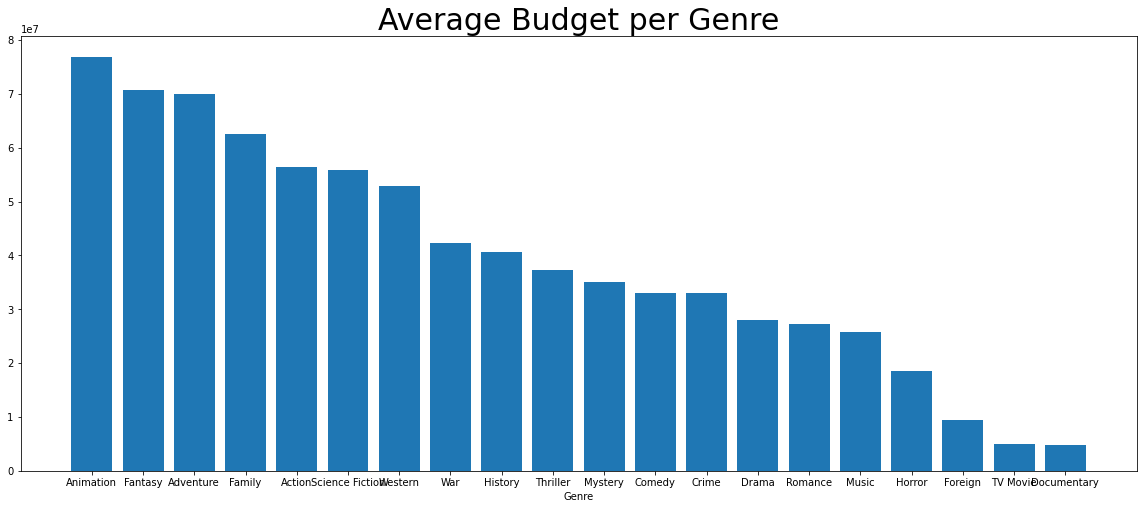

In [36]:
budget_averages = df_averages['budget'].sort_values(ascending = False)
budget_averages

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(budget_averages.index, budget_averages)
ax.set_xlabel('Genre')
ax.set_title('Average Budget per Genre', fontsize=30)


Text(0.5, 1.0, 'Average Revenue per Genre')

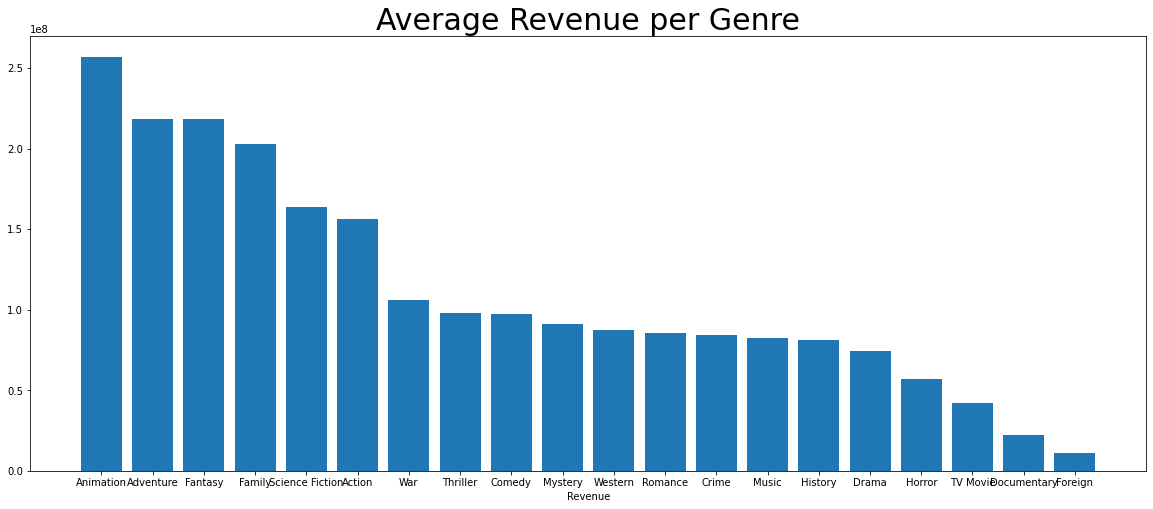

In [34]:
revenue_averages = df_averages['revenue'].sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(revenue_averages.index, revenue_averages)
ax.set_xlabel('Revenue')
ax.set_title('Average Revenue per Genre', fontsize=30)

In [29]:
#creating pop and runtime column to get average of runtime
top_20_pop = df_temp[['popularity','runtime']]
top_20_pop = top_20_pop.sort_values(by="popularity", ascending=False).head(20)
top_20_pop

,popularity,runtime
0,32.985763,124
0,32.985763,124
0,32.985763,124
0,32.985763,124
1,28.419936,120
1,28.419936,120
1,28.419936,120
1,28.419936,120
629,24.949134,169
629,24.949134,169


In [30]:
#average run time
top_20_pop['runtime'].mean(axis=0).round(2)

130.55

In [ ]:
#how many times a genre appears 
def searchByGenre(genre):
    number = 0
    count = 0
    for each in df_temp['genres']:
        if genre in each:
            count += 1
            
    return count
    
print(searchByGenre("Drama"))